### **Analyse customer eligibility for home loan on factors such as income, education level, dependents etc.**

> **By** - **Team Non-Coders**

> **Members** - *Shivang Jitendra Khare (PG-2), Garima Rathi (PGDM - Business Design), Ladi Amarnath Patro (PG-1), Ishojit Roy Choudhury (PG-2), Sahil Samir (PG-2)*









In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [5]:
train = pd.read_csv("/content/train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test = pd.read_csv("/content/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
sub = pd.read_csv("/content/sample_submission_49d68Cx.csv")
sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [8]:
train.shape,test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in train dataset & 367 rows and 12 columns in test dataset.

Make a copy of the train and test data - if we have to make any changes in these datasets we would not lose the original datasets.

In [9]:
train_original=train.copy()
test_original=test.copy()
sub_original=sub.copy()

**Let's Understand Our Data**

In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

12 Independent variables and 1 Dependent variable.

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

We have 3 formats of Data Types - Objects / Int64 / Float64

# ***Univariate Analysis***

### **Independent Variables**

**Loan Status Analysis**

In [14]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

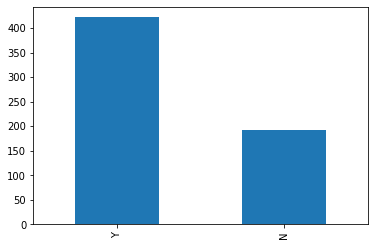

In [15]:
train.Loan_Status.value_counts().plot(kind='bar')

Understand the status of Loan.

In [16]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Understand loan status in proportional terms instead of numbers.
Loan of 68.72% of people was approved.

**Gender Analysis**

In [17]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

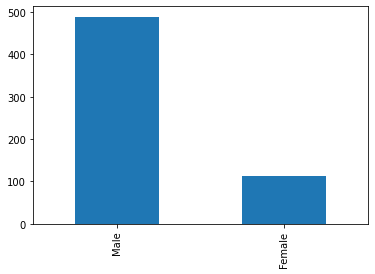

In [18]:
train.Gender.value_counts().plot(kind='bar')

In [19]:
train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

**Analysis of Marriage**

In [20]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

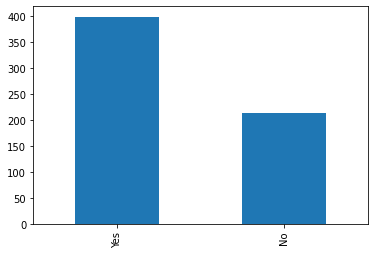

In [21]:
train.Married.value_counts().plot(kind='bar')

In [22]:
train.Married.unique()

array(['No', 'Yes', nan], dtype=object)

**Analysis of Employment**

In [23]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

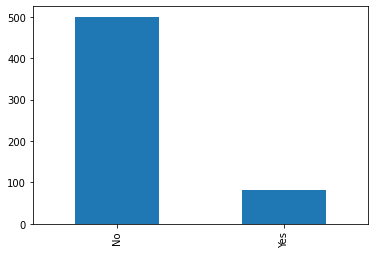

In [24]:
train.Self_Employed.value_counts().plot(kind='bar')

In [25]:
train.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

**Analysis of Credit History**

In [26]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

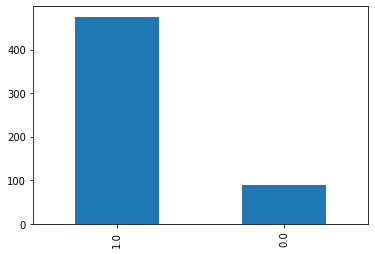

In [28]:
train.Credit_History.value_counts().plot(kind='bar')

**It can be inferred from above plots that -**

1.   81.36% of the applicants are **Males.**
2.   65.13% of the applicants are **Married.**
3.   14.08% of the applicants are **Self Employed.**
4.   84.21% of the applicants have **cleared their doubts.**





# ***Independent Variables***

**Analysis of Dependents**

In [29]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

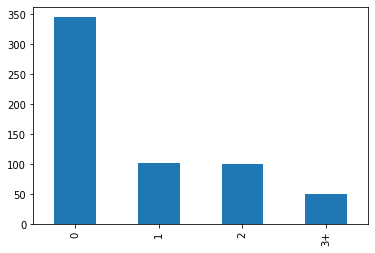

In [30]:
train.Dependents.value_counts().plot(kind='bar')

**Analysis of Education**

In [31]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

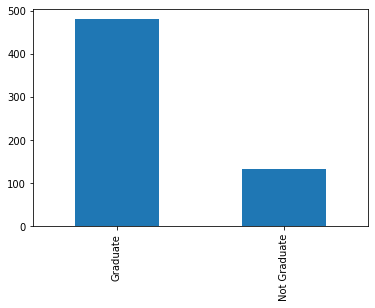

In [32]:
train.Education.value_counts().plot(kind= 'bar')

**Analysis of Property Area**

In [33]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

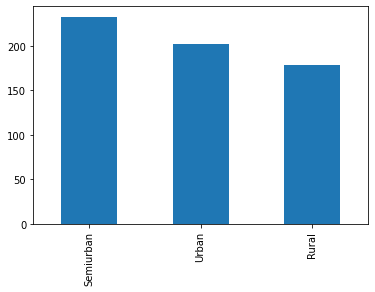

In [34]:
train.Property_Area.value_counts().plot(kind= 'bar')

In [35]:
train['Property_Area'].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

**The following inferences can be made from above plots -**


1.   Most applicants **don't** have dependents.
2.   78.17% of the applicants are **Graduates.**
3.   Most applicants are from **Semi-Urban Areas.**



**Let's dive deeper into Applicant Income** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


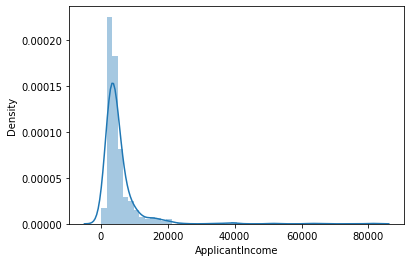

In [71]:
sns.distplot(train["ApplicantIncome"])
plt.show()

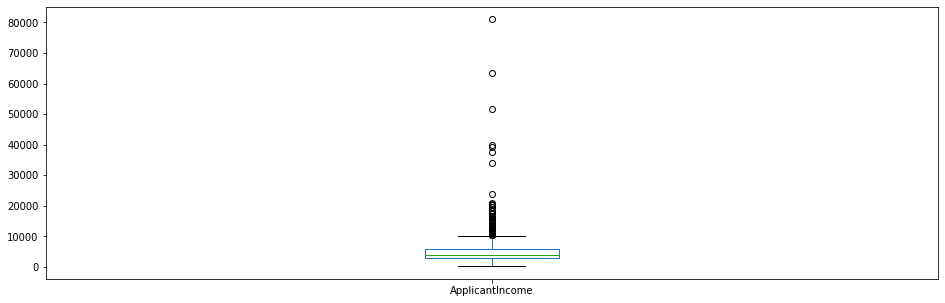

In [69]:
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

The first plot shows that most of the data in the distribution are towards the left side which means data is **not normally distributed**. The second plot (Box Plot) confirms the presence of a **lot of outliers**. Maybe because the data set contains a lot of people with **different education levels**.

**Segregating Applicant Income from Education**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


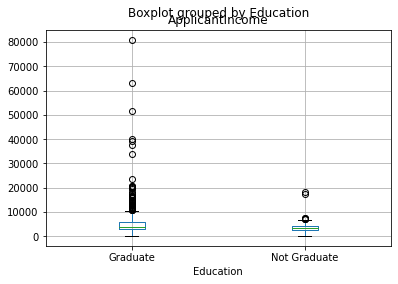

In [70]:
train.boxplot(column='ApplicantIncome', by ='Education')

It can be seen that higher number of graduates with higher income appear to be outliers.

**Let's dive deeper into Co-Applicant Data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


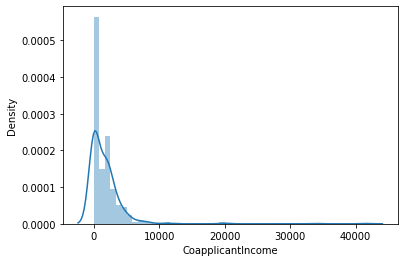

In [39]:
sns.distplot(train["CoapplicantIncome"])
plt.show()

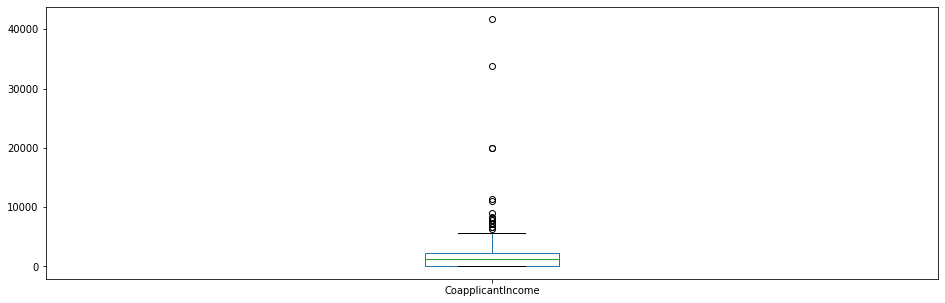

In [40]:
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We can see from above plots that the income for most co-applicants range from **0 to 5000**. Also, from 1st plot, we can conclude there are many outliers and data is **not normally distributed**.

**Let's dive deeper into Loan Data** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


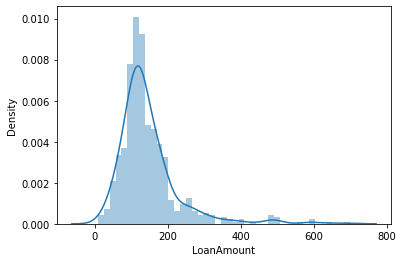

In [41]:
sns.distplot(train["LoanAmount"])
plt.show()

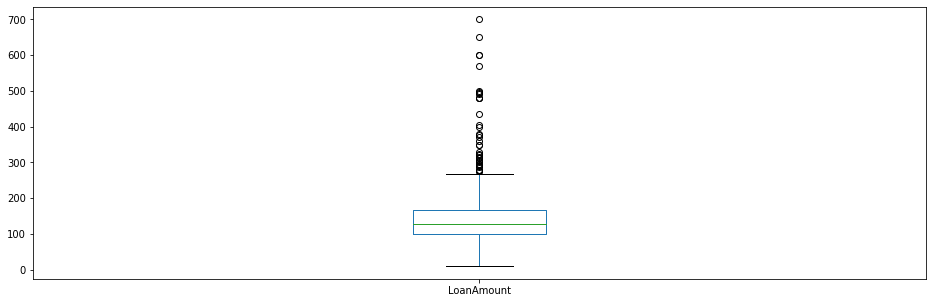

In [42]:
train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

Distribution is **fairly normal** as per the 1st plot. From 2nd plot it can be seen there are a **lot many outliers.**

In [48]:
train['Total_Income'] = train['CoapplicantIncome']+train['ApplicantIncome']
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Income_bin,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,Average,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Average,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Average,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Low,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,Average,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,High,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,High,7583.0


# **Bivariate Analysis**

Hypothesis - 

1. Higher income applicants should have higher chances of loan approvals.
2. If loan amount is less, loan approval chances should be high.
3. Lesser the repayment amount, higher the chances to get loan approved.
4. Applicants already repaid previous loan amounts should have higher chance of loan getting approved.

**Gender vs Loan Status**

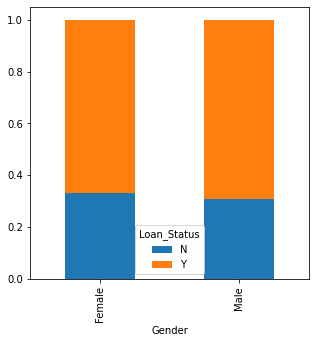

In [49]:
Gender=pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

Proportion of males and females is almost same for approved and unapproved loans.

**Married vs Loan Status / Dependants vs Loan Status / Education vs Loan Status / Self Employed vs Loan Status**

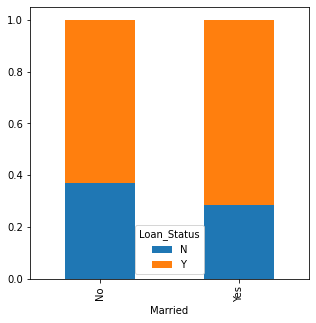

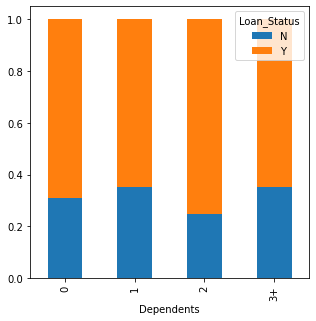

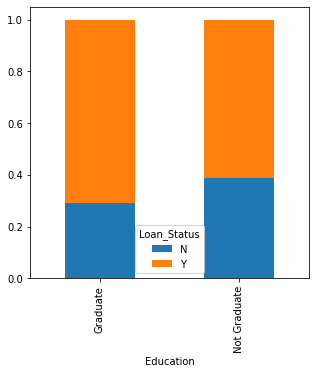

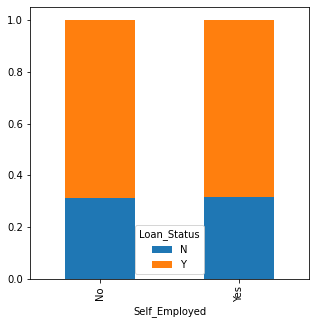

In [50]:
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Dependents=pd.crosstab(train["Dependents"],train["Loan_Status"])
Education=pd.crosstab(train["Education"],train["Loan_Status"])
Self_Employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

1. For approved loans, proportion of married applicants is **more.**
2. 1 or 3+ dependents proportion is **same** for approved loans.
3. Nothing significant can be said for **Self-Employed vs Loan Status.**

**Credit History vs Loan Status / Property Area vs Loan Status**

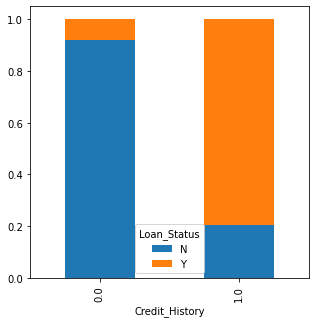

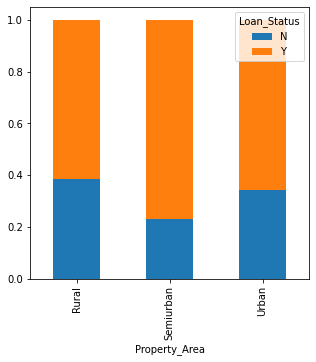

In [51]:
Credit_History=pd.crosstab(train["Credit_History"],train["Loan_Status"])
Property_Area=pd.crosstab(train["Property_Area"],train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(5,5))
plt.show()

1. People with Credit History of 1 have **more** chances of getting loan approved.
2. Semi-urban areas have **higher chance** of getting loan approved than rural or urban areas.

Text(0, 0.5, 'Percentage')

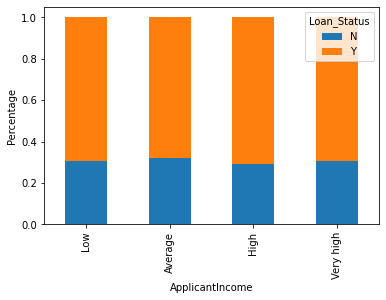

In [52]:
bins=[0,3000,7000,9000,81000]
group=["Low","Average","High","Very high"]
train["Income_bin"]=pd.cut(train["ApplicantIncome"],bins,labels=group)
Income_bin=pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

***Applicant's income does not affect the chances of loan approvals***

Text(0, 0.5, 'Percentage')

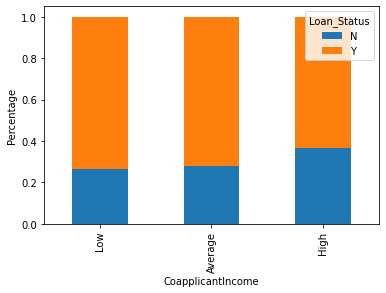

In [53]:
bins=[0,2000,5000,42000]
group=["Low","Average","High"]
train["Coapplicant_Income_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train["Coapplicant_Income_bin"],train["Loan_Status"])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

***If income of co-applicant is less then Loan approval chances are high but this could be wrong as some applicants may not have a co-applicant at all.***

Text(0, 0.5, 'Percentage')

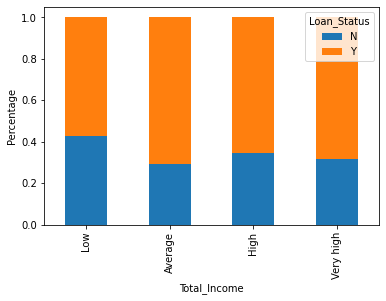

In [54]:
train["Total_Income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
bins=[0,3000,7000,9000,81000]
group=["Low","Average","High","Very high"]
train["Total_Income_bin"]=pd.cut(train["Total_Income"],bins,labels=group)
Total_Income_bin=pd.crosstab(train["Total_Income_bin"],train["Loan_Status"])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

***People with low total income have less chances of getting loans approved.***

In [55]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin'], axis=1)
train["Dependents"].replace('3+', 3,inplace=True)
test["Dependents"].replace('3+', 3,inplace=True)
train["Loan_Status"].replace('N', 0,inplace=True)
train["Loan_Status"].replace('Y', 1,inplace=True)

## Visualize data via **Heat Maps**. Variables with **darker colors** means their correlation is **more.**

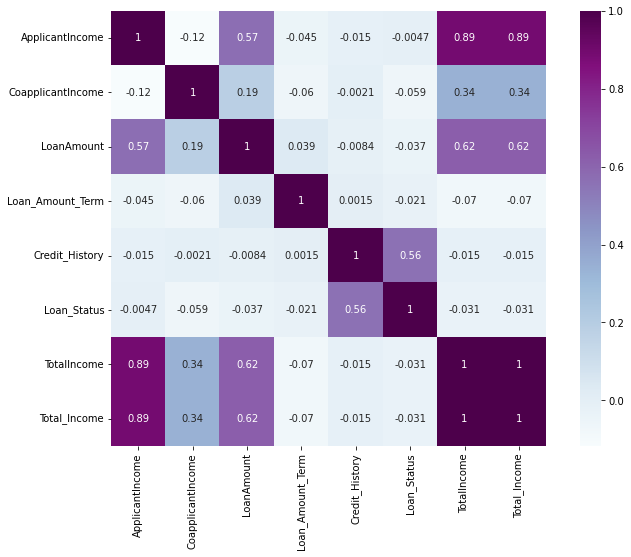

In [56]:
matrix = train.corr()
f = plt.subplots(figsize=(12,8))
sns.heatmap(matrix,vmax=1,square=True,cmap='BuPu', annot = True)

The variables that correlate are **(ApplicantIncome — LoanAmount), (Credit_History — Loan_Status) and (LoanAmount - CoapplicantIncome)**.

## **Missing Values**

In [57]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
Total_Income          0
Total_Income_bin      0
dtype: int64

1. For numberical variables we are using mean and median.
2. For categorical variables we are using mode.

In [58]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)

**For Loan Amounts Term**

In [59]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

From above, it can be seen that the value of 360 is repeating the most for Loan Amount Term variable. Hence, replacing the missing values with mode of the variable.

In [60]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

**For Loan Amounts**

We will use median to fill the missing value for loan amounts.

In [61]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

**Now checking the data set**

In [62]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
Total_Income         0
Total_Income_bin     0
dtype: int64

All missing values have been filled in the **train** dataset.

### **For Test Dataset**

Similarily, let's fill missing value in test dataset.

In [63]:
test["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
test["Married"].fillna(train["Married"].mode()[0], inplace=True)
test["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
test["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)
test["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

### **Working on Ouliers**

Due to the outliers, bulk of the data in the loan amount is at the left and the right tail is longer (as seen in Univariate Analysis). Hence, data is skewed to right. To solve this we are using log transformation method. This will help us get a distribution similar to **Normal Distribution.**

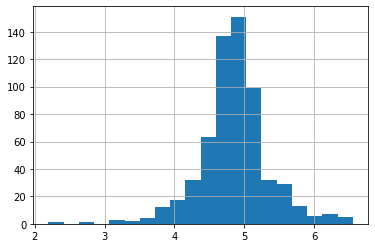

In [64]:
train["LoanAmount_log"]=np.log(train["LoanAmount"])
train["LoanAmount_log"].hist(bins=20)
test["LoanAmount_log"]=np.log(test["LoanAmount"])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


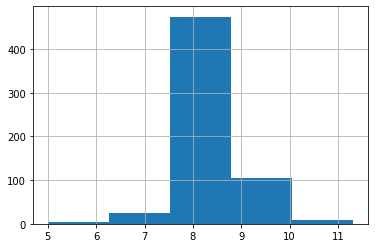

In [65]:
train["ApplicantIncome_log"]=np.log(train["ApplicantIncome"])
train["ApplicantIncome_log"].hist(bins=5)
test["ApplicantIncome_log"]=np.log(test["ApplicantIncome"])